In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

from knobs_functions import *
import warnings
warnings.filterwarnings('ignore')

In [15]:
# crate dictionaries to score the mean and std of each score array
score_mean = dict()
score_std = dict()

for state, chamber in state_chamber_list:
    for score in primary_score_list:
        for ensemble in ensemble_list+['base0']:
            a = fetch_score_array(state, chamber, ensemble, score)
            score_mean[state, chamber, ensemble, score] = np.mean(a)
            score_std[state, chamber, ensemble, score] = np.std(a)

In [17]:
# Normalize the scores relative to the mean and sdt of the base0 ensemble
score_norm = dict()
for state, chamber in state_chamber_list:
    for score in primary_score_list:
        for ensemble in ensemble_list+['base0']:
            if ensemble == 'base0':
                score_norm[state, chamber, ensemble, score] = 0
            else:
                score_norm[state, chamber, ensemble, score] = (
                    (score_mean[state, chamber, ensemble, score] - score_mean[state, chamber, 'base0', score]) /
                    score_std[state, chamber, 'base0', score]
                )

In [18]:
# average over the states and chambers
score_norm_avg = dict()
for ensemble in ensemble_list+['base0']:
    for score in primary_score_list:
        score_norm_avg[ensemble, score]  = np.mean(
            [score_norm[state, chamber, ensemble, score] for state, chamber in state_chamber_list])


In [31]:
# create re-ordering of the ensemble list
my_ensemble_list = ['distpair_ust', 'ust', 'reversible', 'distpair', 'base0', 'county25', 'county50', 'county75', 'county100']

In [75]:
def plot_scores(score_list, state = 'All', chamber = 'All', my_ensemble_list=my_ensemble_list, filename=None):
    n = len(score_list)
    fig, axes = plt.subplots(nrows=n, ncols=1, figsize=(6, 1.2 * n), sharey=True)

    if n == 1:
        axes = [axes]  # Make it iterable if there's only one subplot

    for ax, score in zip(axes, score_list):
        if state == 'All':
            X = [score_norm_avg[ensemble, score] for ensemble in my_ensemble_list]
        else:
            X = [score_norm[state, chamber, ensemble, score] for ensemble in my_ensemble_list]
        L = [ensemble_name_dict_for_plots[ensemble] for ensemble in my_ensemble_list]

        # Assign colors
        unique_labels = list(dict.fromkeys(L))
        colors = plt.cm.tab10.colors
        label_to_color = {label: colors[i % len(colors)] for i, label in enumerate(unique_labels)}

        # Plot points and labels
        for x, label in zip(X, L):
            ax.plot(x, 0, 'o', color=label_to_color[label], markersize=8)
            ax.text(x, 0.03, label, color=label_to_color[label],
                    ha='center', va='bottom', rotation=45, fontsize=10)

        # Style this subplot
        ax.set_yticks([])
        ax.set_ylim(-0.1, 0.15)
        ax.set_xlabel(f'Normalized {score}', fontsize=10)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(True)

        title = f'{state} {chamber}: Normalized score by ensemble' if state != 'All' else 'Normalized score by ensemble (averaged over states and chambers)'
        fig.suptitle(title, fontsize=14, y=1.02)


    plt.tight_layout(h_pad=0.5)
    if filename:
        plt.savefig(filename, bbox_inches='tight')
    plt.show()

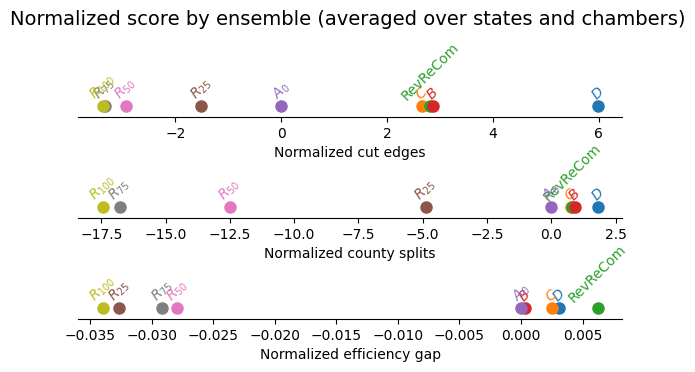

In [72]:
score_list = ['cut edges', 'county splits', 'efficiency gap']
plot_scores(score_list)

In [ ]:
scores_other_than_MMD = ['Reock',
 'Polsby-Popper',
 'cut edges',
 'Dem seats',
 'efficiency gap',
 'mean-median',
 'partisan bias',
 'competitive districts',
 'average margin',
 'county splits',
 'counties split',
]

plot_scores(scores_other_than_MMD, filename='graphs/score_dots.png')

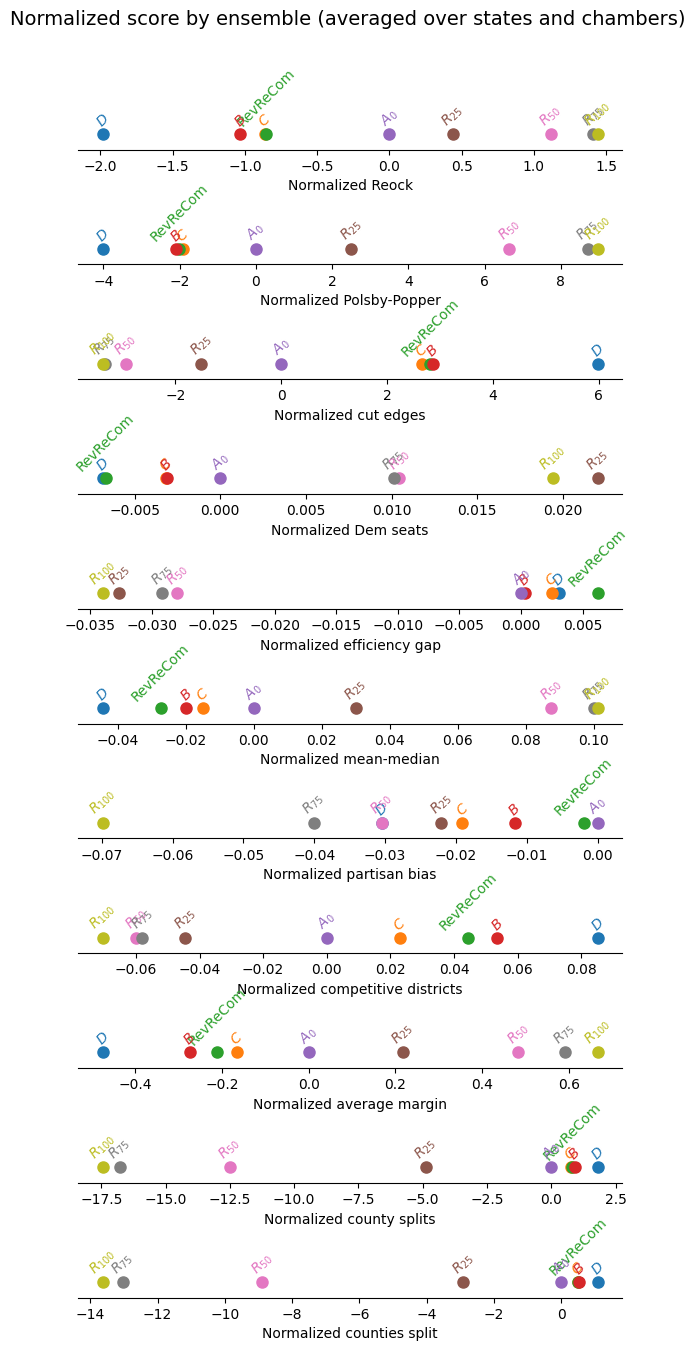

In [77]:
plot_scores(scores_other_than_MMD, state='All', chamber='All', filename='graphs/score_dots_all.png')

In [ ]:
for state, chamber in state_chamber_list:
    plot_scores(scores_other_than_MMD, state, chamber, filename=f'dot_plots/score_dots_{state}_{chamber}.png')